In [1]:
import foolbox
import numpy as np
import torchvision.models as models
import matplotlib.pyplot as plt

In [2]:
model = models.resnet18(pretrained=True).eval()

In [3]:
preprocessing = dict(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], axis=-3)
fmodel = foolbox.models.PyTorchModel(model, bounds=(0, 1), num_classes=1000, preprocessing=preprocessing)

In [4]:
images, labels = foolbox.utils.samples(dataset='imagenet', batchsize=16, data_format='channels_first', bounds=(0, 1))
print(np.mean(fmodel.forward(images).argmax(axis=-1) == labels))

0.9375


In [5]:
attack = foolbox.attacks.FGSM(fmodel)
adversarials = attack(images, labels)

print(np.mean(fmodel.forward(adversarials).argmax(axis=-1) == labels))
print('adversarials', adversarials.shape)

0.0
adversarials (16, 3, 224, 224)


In [6]:
# attack = foolbox.attacks.FGSM(fmodel, distance=foolbox.distances.Linf)
# adversarials = attack(images, labels, unpack=False)

# adversarial_classes = np.asarray([a.adversarial_class for a in adversarials])
# print(labels)
# print(adversarial_classes)
# print(np.mean(adversarial_classes == labels))  # will always be 0.0

# distances = np.asarray([a.distance.value for a in adversarials])
# print("{:.1e}, {:.1e}, {:.1e}".format(distances.min(), np.median(distances), distances.max()))
# print("{} of {} attacks failed".format(sum(adv.distance.value == np.inf for adv in adversarials), len(adversarials)))
# print("{} of {} inputs misclassified without perturbation".format(sum(adv.distance.value == 0 for adv in adversarials), len(adversarials)))

(224, 224, 3)
[0.00075001 0.00075001 0.00075001] [-0.00075001 -0.00075001 -0.00075001]
(224, 224, 3)


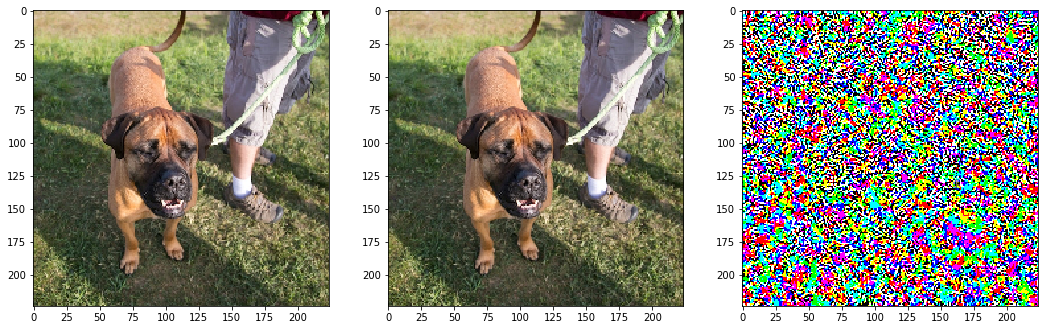

In [7]:
plt.figure(figsize=[18, 6])
image = np.transpose(images[0], (1, 2, 0))
# ad = np.transpose(adversarials[0].perturbed, (1, 2, 0))
ad = np.transpose(adversarials[0], (1, 2, 0))
print(ad.shape)

p = ad - image
imax = np.max(p.reshape((-1, 3)), axis=0)
imin = np.min(p.reshape((-1, 3)), axis=0)
print(imax, imin)
p = (p - imin)/ (imax-imin)
print(p.shape)

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(ad)
plt.subplot(1, 3, 3)
plt.imshow(p)
plt.show()